In [1]:
import nipype
import os,glob,sys,shutil
import nipype.interfaces.fsl as fsl
import nipype.pipeline.engine as pe
import nipype.interfaces.utility as util
import nipype.interfaces.io as nio
from IPython.display import Image

In [2]:
subjRootDir = "/data/HCP_BedpostData/"

FULL_SUBJECT_LIST = [x for x in os.listdir(subjRootDir) if os.path.isdir( subjRootDir+x+'/T1w/Diffusion')]
print(len(FULL_SUBJECT_LIST),"Subjects are potentially available to be processed!")

1007 Subjects are potentially available to be processed!


In [3]:
subject_id_infosource = pe.Node(util.IdentityInterface(fields=['subject_id']),
                                name='subject_id_infosource')
subject_id_infosource.iterables = ('subject_id', FULL_SUBJECT_LIST)

In [4]:
datasource = pe.Node(interface=nio.DataGrabber(infields=['subject_id'],
                                               outfields=['dwi', 'bvec', 'bval']),
                                                 name='datasource')
datasource.inputs.base_directory = subjRootDir 
datasource.inputs.sort_filelist = True
datasource.inputs.template = '%s/T1w/Diffusion/%s'
datasource.inputs.template_args = dict(dwi=[['subject_id', 'data.nii.gz']],
                                       bvecs=[['subject_id', 'bvecs']],
                                       bvals=[['subject_id', 'bvals']],
                                       nodif_brain_mask=[['subject_id','nodif_brain_mask.nii.gz']])
## Just mapped each subject to the corresponding bvec,bvals, brain mask and preprocessed DWI data
### Create the Node for DTIFIT
dtifit = pe.Node(interface=fsl.DTIFit(), name='dtifit')


gen_fa = pe.Workflow(name="gen_fa")
gen_fa.base_dir = '/data/NipypeScratch/'
gen_fa.connect(subject_id_infosource, 'subject_id', datasource, 'subject_id')

gen_fa.connect(subject_id_infosource, 'subject_id', dtifit, 'base_name')
gen_fa.connect(datasource, 'bvecs', dtifit, 'bvecs')
gen_fa.connect(datasource, 'bvals', dtifit, 'bvals')
gen_fa.connect(datasource, 'nodif_brain_mask', dtifit, 'mask')
gen_fa.connect(datasource, 'dwi', dtifit, 'dwi')

In [5]:
datasink = pe.Node(interface=nio.DataSink(), name="datasink")
datasink.inputs.base_directory = os.path.join('/data/NipypeScratch/',
                                              'dtifit_results')
datasink.inputs.parameterization = False
gen_fa.connect(dtifit, 'FA', datasink, 'FA')
gen_fa.connect(dtifit, 'MD', datasink, 'MD')
gen_fa.connect(dtifit, 'V1', datasink, 'V1')
gen_fa.connect(dtifit, 'V2', datasink, 'V2')
gen_fa.connect(dtifit, 'V3', datasink, 'V3')
gen_fa.connect(dtifit, 'L1', datasink, 'L1')
gen_fa.connect(dtifit, 'L2', datasink, 'L2')
gen_fa.connect(dtifit, 'L3', datasink, 'L3')

181118-14:30:44,990 workflow INFO:
	 Generated workflow graph: /data/NipypeScratch/gen_fa/graph.png (graph2use=colored, simple_form=False).
/data/NipypeScratch/gen_fa/graph.png


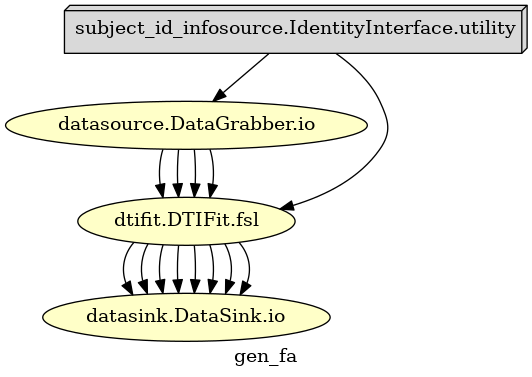

In [6]:
print(gen_fa.write_graph(graph2use='colored',simple_form=False))
Image('/data/NipypeScratch/gen_fa/graph.png')
#Image('/data/HCP_Data/NipypeScratch/gen_fa/graph.png')

In [ ]:
gen_fa.run(plugin='MultiProc', plugin_args={'n_procs' : 20})

181118-14:30:59,953 workflow INFO:
	 Workflow gen_fa settings: ['check', 'execution', 'logging', 'monitoring']
181118-14:31:13,372 workflow INFO:
	 Running in parallel.
181118-14:31:13,692 workflow INFO:
	 [MultiProc] Running 0 tasks, and 1007 jobs ready. Free memory (GB): 169.98/169.98, Free processors: 20/20.
181118-14:31:13,809 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_987074/datasource".
181118-14:31:13,814 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_971160/datasource".
181118-14:31:13,822 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_970764/datasource".
181118-14:31:13,828 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_933253/datasource".
181118-14:31:13,835 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_908860/datasource

181118-14:31:15,976 workflow INFO:
	 [Job 1] Cached (gen_fa.dtifit).
181118-14:31:15,991 workflow INFO:
	 [Job 4] Cached (gen_fa.dtifit).
181118-14:31:16,5 workflow INFO:
	 [Job 7] Cached (gen_fa.dtifit).
181118-14:31:16,19 workflow INFO:
	 [Job 10] Cached (gen_fa.dtifit).
181118-14:31:16,33 workflow INFO:
	 [Job 13] Cached (gen_fa.dtifit).
181118-14:31:16,48 workflow INFO:
	 [Job 16] Cached (gen_fa.dtifit).
181118-14:31:16,63 workflow INFO:
	 [Job 19] Cached (gen_fa.dtifit).
181118-14:31:16,78 workflow INFO:
	 [Job 22] Cached (gen_fa.dtifit).
181118-14:31:16,91 workflow INFO:
	 [Job 25] Cached (gen_fa.dtifit).
181118-14:31:16,105 workflow INFO:
	 [Job 28] Cached (gen_fa.dtifit).
181118-14:31:16,120 workflow INFO:
	 [Job 31] Cached (gen_fa.dtifit).
181118-14:31:16,135 workflow INFO:
	 [Job 34] Cached (gen_fa.dtifit).
181118-14:31:16,149 workflow INFO:
	 [Job 37] Cached (gen_fa.dtifit).
181118-14:31:16,162 workflow INFO:
	 [Job 40] Cached (gen_fa.dtifit).
181118-14:31:16,177 workflow IN

181118-14:31:30,593 workflow INFO:
	 [Job 32] Completed (gen_fa.datasink).
181118-14:31:30,602 workflow INFO:
	 [Job 35] Completed (gen_fa.datasink).
181118-14:31:30,610 workflow INFO:
	 [Job 38] Completed (gen_fa.datasink).
181118-14:31:30,617 workflow INFO:
	 [Job 41] Completed (gen_fa.datasink).
181118-14:31:30,626 workflow INFO:
	 [Job 44] Completed (gen_fa.datasink).
181118-14:31:30,634 workflow INFO:
	 [Job 47] Completed (gen_fa.datasink).
181118-14:31:30,642 workflow INFO:
	 [Job 50] Completed (gen_fa.datasink).
181118-14:31:30,650 workflow INFO:
	 [Job 53] Completed (gen_fa.datasink).
181118-14:31:30,658 workflow INFO:
	 [Job 56] Completed (gen_fa.datasink).
181118-14:31:30,667 workflow INFO:
	 [Job 59] Completed (gen_fa.datasink).
181118-14:31:30,699 workflow INFO:
	 [MultiProc] Running 0 tasks, and 987 jobs ready. Free memory (GB): 169.98/169.98, Free processors: 20/20.
181118-14:31:30,849 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_

181118-14:31:32,657 workflow INFO:
	 [Job 102] Completed (gen_fa.datasource).
181118-14:31:32,667 workflow INFO:
	 [Job 105] Completed (gen_fa.datasource).
181118-14:31:32,678 workflow INFO:
	 [Job 108] Completed (gen_fa.datasource).
181118-14:31:32,687 workflow INFO:
	 [Job 111] Completed (gen_fa.datasource).
181118-14:31:32,699 workflow INFO:
	 [Job 114] Completed (gen_fa.datasource).
181118-14:31:32,709 workflow INFO:
	 [Job 117] Completed (gen_fa.datasource).
181118-14:31:32,740 workflow INFO:
	 [MultiProc] Running 0 tasks, and 987 jobs ready. Free memory (GB): 169.98/169.98, Free processors: 20/20.
181118-14:31:32,925 workflow INFO:
	 [Job 61] Cached (gen_fa.dtifit).
181118-14:31:32,939 workflow INFO:
	 [Job 64] Cached (gen_fa.dtifit).
181118-14:31:32,953 workflow INFO:
	 [Job 67] Cached (gen_fa.dtifit).
181118-14:31:32,968 workflow INFO:
	 [Job 70] Cached (gen_fa.dtifit).
181118-14:31:32,982 workflow INFO:
	 [Job 73] Cached (gen_fa.dtifit).
181118-14:31:32,996 workflow INFO:
	 [J

	 [Node] Finished "gen_fa.datasink".
181118-14:31:41,196 workflow INFO:
	 [Job 68] Completed (gen_fa.datasink).
181118-14:31:41,209 workflow INFO:
	 [Job 71] Completed (gen_fa.datasink).
181118-14:31:41,220 workflow INFO:
	 [Job 74] Completed (gen_fa.datasink).
181118-14:31:41,230 workflow INFO:
	 [Job 77] Completed (gen_fa.datasink).
181118-14:31:41,238 workflow INFO:
	 [Job 80] Completed (gen_fa.datasink).
181118-14:31:41,251 workflow INFO:
	 [Job 83] Completed (gen_fa.datasink).
181118-14:31:41,259 workflow INFO:
	 [Job 86] Completed (gen_fa.datasink).
181118-14:31:41,267 workflow INFO:
	 [Job 89] Completed (gen_fa.datasink).
181118-14:31:41,276 workflow INFO:
	 [Job 92] Completed (gen_fa.datasink).
181118-14:31:41,284 workflow INFO:
	 [Job 95] Completed (gen_fa.datasink).
181118-14:31:41,291 workflow INFO:
	 [Job 98] Completed (gen_fa.datasink).
181118-14:31:41,299 workflow INFO:
	 [Job 101] Completed (gen_fa.datasink).
181118-14:31:41,307 workflow INFO:
	 [Job 104] Completed (gen_

181118-14:31:43,205 workflow INFO:
	 [Job 135] Completed (gen_fa.datasource).
181118-14:31:43,214 workflow INFO:
	 [Job 138] Completed (gen_fa.datasource).
181118-14:31:43,222 workflow INFO:
	 [Job 141] Completed (gen_fa.datasource).
181118-14:31:43,230 workflow INFO:
	 [Job 144] Completed (gen_fa.datasource).
181118-14:31:43,238 workflow INFO:
	 [Job 147] Completed (gen_fa.datasource).
181118-14:31:43,246 workflow INFO:
	 [Job 150] Completed (gen_fa.datasource).
181118-14:31:43,256 workflow INFO:
	 [Job 153] Completed (gen_fa.datasource).
181118-14:31:43,264 workflow INFO:
	 [Job 156] Completed (gen_fa.datasource).
181118-14:31:43,272 workflow INFO:
	 [Job 159] Completed (gen_fa.datasource).
181118-14:31:43,280 workflow INFO:
	 [Job 162] Completed (gen_fa.datasource).
181118-14:31:43,288 workflow INFO:
	 [Job 165] Completed (gen_fa.datasource).
181118-14:31:43,296 workflow INFO:
	 [Job 168] Completed (gen_fa.datasource).
181118-14:31:43,307 workflow INFO:
	 [Job 171] Completed (gen_fa

	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_100206/datasink".
181118-14:32:14,916 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:32:14,954 workflow INFO:
	 [Job 122] Completed (gen_fa.datasink).
181118-14:32:14,924 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_293748/datasink".
181118-14:32:14,964 workflow INFO:
	 [Job 125] Completed (gen_fa.datasink).
181118-14:32:14,941 workflow INFO:
	 [Node] Finished "gen_fa.datasink".181118-14:32:14,973 workflow INFO:
	 [Job 128] Completed (gen_fa.datasink).

181118-14:32:14,982 workflow INFO:
	 [Job 131] Completed (gen_fa.datasink).
181118-14:32:14,946 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")181118-14:32:14,989 workflow INFO:
	 [Job 134] Completed (gen_fa.datasink).

181118-14:32:14,998 workflow INFO:
	 [Job 137] Completed (gen_fa.datasink).
181118-14:32:14,968 workflow INFO:
	 [Node] F

	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:32:15,513 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:32:15,514 workflow INFO:
	 [Node] Finished "gen_fa.datasource".

181118-14:32:15,527 workflow INFO:
	 [Node] Finished "gen_fa.datasource".
181118-14:32:16,951 workflow INFO:
	 [Job 180] Completed (gen_fa.datasource).
181118-14:32:16,959 workflow INFO:
	 [Job 183] Completed (gen_fa.datasource).
181118-14:32:16,968 workflow INFO:
	 [Job 186] Completed (gen_fa.datasource).
181118-14:32:16,977 workflow INFO:
	 [Job 189] Completed (gen_fa.datasource).
181118-14:32:16,985 workflow INFO:
	 [Job 192] Completed (gen_fa.datasource).
181118-14:32:16,993 workflow INFO:
	 [Job 195] Completed (gen_fa.datasource).
181118-14:32:17,3 workflow INFO:
	 [Job 198] Completed (gen_fa.datasource).
181118-14:32:17,11 workflow INFO:
	 [Job 201] Completed (gen_fa.datasource).
181118-14:32:17,20 workflow INFO:
	 [Job 204] Completed (gen_fa.datasource).
181118-14:32:

	 [Node] Finished "gen_fa.datasink".
181118-14:32:32,117 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_773257/datasink".
181118-14:32:32,139 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:32:32,161 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:32:32,270 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_990366/datasink".
181118-14:32:32,291 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:32:32,314 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:32:35,909 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_724446/datasink".
181118-14:32:35,929 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:32:35,953 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:32:39,314 workflow INFO:
	 [Node] Setting-up

	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_728454/datasource".

181118-14:32:39,834 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:32:39,837 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_176845/datasource".

181118-14:32:39,840 workflow INFO:
	 [Node] Finished "gen_fa.datasource".
181118-14:32:39,859 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:32:39,858 workflow INFO:
	 [Node] Finished "gen_fa.datasource".

181118-14:32:39,866 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:32:39,866 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:32:39,867 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")


181118-14:32:39,887 workflow INFO:
	 [Node] Finished "gen_fa.datasource".
181118-14:32:39,891 workflow INFO:
	 [Node] Finished "

	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_385046/datasink".
181118-14:32:59,814 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:32:59,819 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_656657/datasink".
181118-14:32:59,839 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:32:59,841 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_151829/datasink".181118-14:32:59,843 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:32:59,864 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_859671/datasink".181118-14:32:59,864 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:32:59,873 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:32:59,891 workflow INFO:
	 [Node] Running "datasink" (

	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:01,412 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_751550/datasource".181118-14:33:01,418 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:01,419 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:01,404 workflow INFO:
	 [Node] Finished "gen_fa.datasource".



181118-14:33:01,422 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_220721/datasource".181118-14:33:01,419 workflow INFO:
	 [Node] Finished "gen_fa.datasource".


181118-14:33:01,433 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:33:01,431 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:01,453 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:01,449 workflow

	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_182436/datasink".
181118-14:33:08,497 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_209127/datasink".181118-14:33:08,497 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:33:08,519 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")181118-14:33:08,524 workflow INFO:
	 [Node] Finished "gen_fa.datasink".

181118-14:33:08,529 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_734045/datasink".
181118-14:33:08,548 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:08,554 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:08,579 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:09,563 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_735148/dat

	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_205725/datasource".

181118-14:33:11,526 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:11,532 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_114318/datasource".181118-14:33:11,533 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:11,534 workflow INFO:
	 [Node] Finished "gen_fa.datasource".


181118-14:33:11,540 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:11,546 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_191942/datasource".181118-14:33:11,547 workflow INFO:
	 [Node] Finished "gen_fa.datasource".

181118-14:33:11,552 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:11,557 workflow INFO:
	 [Node] Finished "gen_fa.dat

	 [Node] Finished "gen_fa.datasink".
181118-14:33:27,64 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_454140/datasink".
181118-14:33:27,88 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:27,112 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:27,142 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_401422/datasink".
181118-14:33:27,168 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:27,169 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_314225/datasink".
181118-14:33:27,191 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:27,196 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:27,219 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:27,762 workflow INFO:
	 [Node] Setting-up "

	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_168341/datasource".
181118-14:33:28,379 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:28,379 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:28,380 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:33:28,381 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_919966/datasource".



181118-14:33:28,384 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:28,395 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_195041/datasource".
181118-14:33:28,401 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:33:28,401 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")

181118-14:33:28,408 workflow INFO:
	 [Node] Running "datasource" 

	 [Node] Finished "gen_fa.datasink".
181118-14:33:39,424 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_771354/datasink".
181118-14:33:39,445 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:39,465 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:39,853 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_441939/datasink".
181118-14:33:39,872 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_140420/datasink".
181118-14:33:39,876 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:39,895 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:33:39,899 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_141119/datasink".
181118-14:33:39,901 workflow INFO:
	 [Node] Finished "gen_fa.dat

	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")

181118-14:33:40,482 workflow INFO:
	 [Node] Finished "gen_fa.datasource".
181118-14:33:40,488 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:40,488 workflow INFO:
	 [Node] Finished "gen_fa.datasource".

181118-14:33:40,497 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_706040/datasource".181118-14:33:40,498 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")

181118-14:33:40,508 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:33:40,509 workflow INFO:
	 [Node] Finished "gen_fa.datasource".

181118-14:33:40,510 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_192035/datasource".
181118-14:33:40,525 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:40,527 workflow INFO:
	 [Node] Setting-up 

	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")181118-14:33:48,308 workflow INFO:
	 [Node] Finished "gen_fa.datasink".

181118-14:33:48,328 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:49,464 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_645450/datasink".
181118-14:33:49,484 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_204420/datasink".181118-14:33:49,485 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:33:49,502 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_206222/datasink".
181118-14:33:49,510 workflow INFO:
	 [Node] Finished "gen_fa.datasink".181118-14:33:49,513 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:33:49,531 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_321323/dat

	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_160123/datasource".
181118-14:33:55,231 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:55,233 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_397154/datasource".181118-14:33:55,234 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")


181118-14:33:55,241 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:33:55,242 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_615744/datasource".

181118-14:33:55,245 workflow INFO:
	 [Node] Finished "gen_fa.datasource".
181118-14:33:55,250 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:33:55,251 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:33:55,254 workflow INFO:
	 [Node] Setting-up "gen_fa.dat

	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_128935/datasink".
181118-14:33:59,18 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_135528/datasink".181118-14:33:59,18 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:33:59,42 workflow INFO:
	 [Node] Finished "gen_fa.datasink".181118-14:33:59,41 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")

181118-14:33:59,69 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:33:59,973 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_562345/datasink".
181118-14:33:59,994 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:34:00,16 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:34:01,320 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_390645/datasink"

	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_833148/datasource".
181118-14:34:08,359 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
181118-14:34:08,364 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:34:08,365 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_663755/datasource".

181118-14:34:08,379 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_187547/datasource".
181118-14:34:08,393 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")181118-14:34:08,390 workflow INFO:
	 [Node] Finished "gen_fa.datasource".181118-14:34:08,391 workflow INFO:
	 [Node] Setting-up "gen_fa.datasource" in "/data/NipypeScratch/gen_fa/_subject_id_154431/datasource".181118-14:34:08,397 workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
1811

	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_770352/datasink".
181118-14:34:15,952 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:34:15,973 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:34:17,322 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_103515/datasink".
181118-14:34:17,346 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:34:17,368 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:34:17,389 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_826454/datasink".
181118-14:34:17,412 workflow INFO:
	 [Node] Running "datasink" ("nipype.interfaces.io.DataSink")
181118-14:34:17,437 workflow INFO:
	 [Node] Finished "gen_fa.datasink".
181118-14:34:18,325 workflow INFO:
	 [Node] Setting-up "gen_fa.datasink" in "/data/NipypeScratch/gen_fa/_subject_id_833148/dat

In [ ]:
#!ls /data/HCP_Data/HCP_BedpostData/106016/T1w/Diffusion/

In [ ]:
### Copy files in the dtifit results directory to the canonical location if the file isnt there yet
from os.path import join as oj
import shutil
fileType = ["FA", "L1", "L2", "L3", "MD", "V1", "V2", "V3"]
dtifit_NP_Results = "/data/NipypeScratch/dtifit_results/"

HCP_procData = "/data/HCP_BedpostData/"

for ft in fileType:
    ## going to loop through each fileType directory and grab the files and then copy them to the HCP Data directory
    ## if they don't exist 
    fl = os.listdir( oj(dtifit_NP_Results,ft) )
    for f in fl:
        subjID = f.split('_')[0]
        
        targetFile = oj(HCP_procData,subjID,"T1w","Diffusion","data_%s.nii.gz"%ft)
        srcFile = oj(dtifit_NP_Results,ft,f)
        #print(f,subjID,srcFile,targetFile)
        
        if not os.path.isfile(targetFile):
            shutil.copy(srcFile,targetFile)

In [ ]:
NEEDS_BEDPOSTX_RUN = [x for x in os.listdir(subjRootDir) if ( os.path.isdir( subjRootDir+x+'/T1w/Diffusion') and not os.path.isdir(subjRootDir+x+'/T1w/Diffusion.bedpostX'))  ]
print(len(NEEDS_BEDPOSTX_RUN),"Subjects NEED BedpostX To be Run!")

In [7]:
### Also create the nodif_brain and nodif images for any file that has DTIFIT run

from nipype.caching import Memory
mem = Memory(base_dir='/data/NipypeScratch/')

fsl_ExtractROI = mem.cache(fsl.ExtractROI)
fsl_ImageMaths = mem.cache(fsl.ImageMaths)


for s in FULL_SUBJECT_LIST:
    dtiData = "/data/HCP_BedpostData/%s/T1w/Diffusion/data.nii.gz" % s
    nodif_brain_mask = "/data/HCP_BedpostData/%s/T1w/Diffusion/nodif_brain_mask.nii.gz" % s
    
    
    ### These are the files I am trying to generate...
    nodif_brain =  "/data/HCP_BedpostData/%s/T1w/Diffusion/nodif_brain.nii.gz" % s
    nodif =  "/data/HCP_BedpostData/%s/T1w/Diffusion/nodif.nii.gz" % s

    if not os.path.isfile(nodif):
        print(nodif)
        try:
            r = fsl_ExtractROI(in_file=dtiData, t_min=0,t_size=1)
            print(r.outputs.roi_file)
        except:
            print("Subject %s doesn't have all DTI data??" % s)
    
        ## Now copy the generated nodif file to the canonical location
        shutil.copy(r.outputs.roi_file,nodif)
            
            
    if not os.path.isfile(nodif_brain):
        try:
            rim = fsl_ImageMaths(in_file=r.outputs.roi_file, op_string="-mas %s" % nodif_brain_mask)
        except:
            print("Subject %s could not run masking of original file" % s)
        shutil.copy(rim.outputs.out_file,nodif_brain)        

## Apply Brain Extraction Mask to T1 Image--

####right now we are using the default from freesurfer, but it looks kind of crappy



In [ ]:
for s in FULL_SUBJECT_LIST:
    ### These are the files I am trying to generate...
    T1 =  "/data/HCP_BedpostData/%s/T1w/T1w_acpc_dc.nii.gz" % s
    T1_MASK_FS =  "/data/HCP_BedpostData/%s/T1w/brainmask_fs.nii.gz" % s
    T1_BRAIN_FS="/data/HCP_BedpostData/%s/T1w/T1w_acpc_dc_masked.nii.gz" %s
    
    if not os.path.isfile(T1_BRAIN_FS):
#    if os.path.isfile(T1) and os.path.isfile(T1_MASK_FS):
        if os.path.isfile(T1) and os.path.isfile(T1_MASK_FS):
            try:
                rim = fsl_ImageMaths(in_file=T1, op_string="-mas %s" % T1_MASK_FS)
                shutil.copy(rim.outputs.out_file,T1_BRAIN_FS)
            except:
                print("Subject %s could not run masking of original T1 file using freesurfer mask" % s)


/data/HCP_BedpostData/101006/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/101410/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/102513/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/106016/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/112516/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/122822/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/124624/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/128026/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/130821/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/132118/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/134324/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/138231/T1w/T1w_acpc_dc_masked.nii.gz Already had a mask
/data/HCP_BedpostData/144428/T1w/T1w_acpc_dc_masked.nii.gz Alrea

180921-12:44:35,323 workflow INFO:
	 [Node] Finished "63cc1a530383edecee70e568121048d8".
180921-12:44:35,480 workflow INFO:
	 [Node] Setting-up "a90c0c02940268d0967338a273fc97e1" in "/data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/a90c0c02940268d0967338a273fc97e1".
180921-12:44:35,494 workflow INFO:
	 [Node] Running "a90c0c02940268d0967338a273fc97e1" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /data/HCP_BedpostData/115724/T1w/T1w_acpc_dc.nii.gz -mas /data/HCP_BedpostData/115724/T1w/brainmask_fs.nii.gz /data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/a90c0c02940268d0967338a273fc97e1/T1w_acpc_dc_maths.nii.gz
180921-12:44:39,370 workflow INFO:
	 [Node] Finished "a90c0c02940268d0967338a273fc97e1".
180921-12:44:39,521 workflow INFO:
	 [Node] Setting-up "f940aa61d31217ca1b144ee310b9d87e" in "/data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/f940aa61d31217ca1b144ee310b9d87e".
180921-1

180921-12:45:21,372 workflow INFO:
	 [Node] Finished "6ea6decfc52e53f27faf4882cf9b545f".
180921-12:45:21,522 workflow INFO:
	 [Node] Setting-up "ba2326b3ae49f3e657da50f82483ea23" in "/data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/ba2326b3ae49f3e657da50f82483ea23".
180921-12:45:21,531 workflow INFO:
	 [Node] Running "ba2326b3ae49f3e657da50f82483ea23" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /data/HCP_BedpostData/453542/T1w/T1w_acpc_dc.nii.gz -mas /data/HCP_BedpostData/453542/T1w/brainmask_fs.nii.gz /data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/ba2326b3ae49f3e657da50f82483ea23/T1w_acpc_dc_maths.nii.gz
180921-12:45:25,397 workflow INFO:
	 [Node] Finished "ba2326b3ae49f3e657da50f82483ea23".
180921-12:45:25,516 workflow INFO:
	 [Node] Setting-up "22d07e7859bbca484e48a94ee4a740cf" in "/data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/22d07e7859bbca484e48a94ee4a740cf".
180921-1

180921-12:45:51,962 workflow INFO:
	 [Node] Running "969e0903de1808d75e12fe92678e20b0" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /data/HCP_BedpostData/106824/T1w/T1w_acpc_dc.nii.gz -mas /data/HCP_BedpostData/106824/T1w/brainmask_fs.nii.gz /data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/969e0903de1808d75e12fe92678e20b0/T1w_acpc_dc_maths.nii.gz
180921-12:45:55,908 workflow INFO:
	 [Node] Finished "969e0903de1808d75e12fe92678e20b0".
180921-12:45:56,78 workflow INFO:
	 [Node] Setting-up "dec36917f1ad8957b8e199ff72cfc85c" in "/data/NipypeScratch/nipype_mem/nipype-interfaces-fsl-utils-ImageMaths/dec36917f1ad8957b8e199ff72cfc85c".
180921-12:45:56,88 workflow INFO:
	 [Node] Running "dec36917f1ad8957b8e199ff72cfc85c" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /data/HCP_BedpostData/111211/T1w/T1w_acpc_dc.nii.gz -mas /data/HCP_BedpostData/111211/T1w/brainmask_fs.nii.gz /data/Nipy

In [ ]:
" ".join(NEEDS_BEDPOSTX_RUN)
